This notebook will be used to investigate the event rates with respect to redshift. It will be using some of Lieke's code for binning the metallicites. 

The goal is to count how many systems are in each metallicity bin and plot them against the event rate

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')

In [2]:
import sys
import os

# Add the subdir to sys.path
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 


Let's get the WD+WD data

In [3]:
# reading in the HDF5 file
pathTorates_H5 = '/home/jovyan/home/rate_outputs/Rate_info_WDWD_1.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [4]:
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [5]:
# reading in the HDF5 file
pathToweights_H5 = '/home/jovyan/home/edit_hdf5/WDWD/v02.46.01/COMPAS_Output_wWeights.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [6]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

Let's just select for these systems in our dco table

In [7]:
# gathering the seeds from the rates.h5 file - this is for the WD+WD
dco_mask = rates_info['DCOmask'][()]
merging_all_WD = DCO_WD_data[dco_mask]
merging_all_WD

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
463,1,64.106710,0.0,0,"b""b'8 '""","b""b'3 '""",0.483516,0.394784,1,0.000438,0,1,NaN,NaN,29,0.517110,11,11,1536.080151,7.360919
464,2,0.049491,0.0,0,"b""b'5 '""","b""b'3 '""",0.568929,0.211294,1,0.002140,0,1,NaN,NaN,86,0.074546,11,10,8874.314167,7.842265
465,1,8321.641517,0.0,0,"b""b'3 '""","b""b'5 '""",0.320580,0.526926,1,0.002418,0,1,NaN,NaN,87,1.677890,10,11,4428.913115,10.000000
466,1,441.783850,0.0,0,"b""b'1-2 '""","b""b'5-8 '""",0.276373,0.679873,1,0.012405,0,1,NaN,NaN,97,0.852472,10,11,1390.603090,9.999991
467,1,7164.965181,0.0,0,"b""b'2 '""","b""b'3 '""",0.527024,0.316107,1,0.000135,0,1,NaN,NaN,128,1.608598,11,10,3852.634168,9.992004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17486,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,0,1,NaN,NaN,999745,1.354646,11,11,109.254748,0.298381
17487,2,2834.654788,0.0,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,0,1,NaN,NaN,999761,1.610884,11,11,940.615944,0.254697
17488,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,0,1,NaN,NaN,999871,1.558990,11,11,1787.995323,0.212650
17489,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,0,1,NaN,NaN,999912,1.954841,11,11,382.472452,0.160558


In [8]:
# let's look at if any of these systems RLOF post CE
np.sum(merging_all_WD['Immediate_RLOF>CE']==True)

np.int64(0)

Let's add the merger rate to this table

In [9]:
rates = rates_info['merger_rate']

for i in range(rates_info['merger_rate'][0,:].shape[0]):

    merging_all_WD['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]

/tmp/ipykernel_1046/3880007837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_WD['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_1046/3880007837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_WD['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_1046/3880007837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Let's make different bins for metallicity. Let's look at how redshifts are split to get an intuition on how to bin these

In [10]:
redshifts = rates_info['redshifts']
display(redshifts[()])
display(redshifts)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9])

<HDF5 dataset "redshifts": shape (80,), type "<f8">

After looking at Lieke's code it seems like we need to find the mass evolved per metallicity to then correctly count how many systems merge at different redshifts

I know this is wrong because we are not considering the mass evolved per Z but let's count how many systems have a certain metallicity and make an 80 binned metallcity dist

In [11]:
# let's look at the ranges of metallicites we have
print('min metallicity=',np.min(merging_all_WD['Metallicity@ZAMS(1)']))
print('max metallicity=',np.max(merging_all_WD['Metallicity@ZAMS(1)']))
Z_bins = np.linspace(np.log10(np.min(merging_all_WD['Metallicity@ZAMS(1)'])),np.log10(np.max(merging_all_WD['Metallicity@ZAMS(1)'])),80)

min metallicity= 0.0001000075520179
max metallicity= 0.0299916009367008


Let's bin the metallicities evenly in log so that when we eventually normalize it, the average star formaing mass needed is just a constant

In [12]:
# let's first make our bins that we want that are evenly spaced in log
metallicities = np.array(merging_all_WD['Metallicity@ZAMS(1)'])
metallicities_log = np.log10(metallicities)
even_Z = np.linspace(-4, np.max(metallicities_log), 20)
bins_Z = even_Z
bins_Z

# make bins slightly lower than min and slightly higher than min to get all of the systems (10^-4 for lower limit), log10(0.03) for upper limit

array([-4.        , -3.8696316 , -3.73926319, -3.60889479, -3.47852639,
       -3.34815799, -3.21778958, -3.08742118, -2.95705278, -2.82668438,
       -2.69631597, -2.56594757, -2.43557917, -2.30521077, -2.17484236,
       -2.04447396, -1.91410556, -1.78373716, -1.65336875, -1.52300035])

We now want to count how many systems are in each of these metallicity bins

In [13]:
# # using value_counts to count how many systems fit into each bin
# print(np.log10(merging_all_WD['Metallicity@ZAMS(1)']).value_counts(sort=False,bins=20))

In [13]:
counts_bins = pd.cut(np.log10(merging_all_WD['Metallicity@ZAMS(1)']), bins=bins_Z).value_counts(sort=False)
counts_bins

Metallicity@ZAMS(1)
(-4.0, -3.87]        734
(-3.87, -3.739]      822
(-3.739, -3.609]     760
(-3.609, -3.479]     750
(-3.479, -3.348]     719
(-3.348, -3.218]     714
(-3.218, -3.087]     742
(-3.087, -2.957]     804
(-2.957, -2.827]     682
(-2.827, -2.696]     704
(-2.696, -2.566]     750
(-2.566, -2.436]     895
(-2.436, -2.305]    1025
(-2.305, -2.175]    1157
(-2.175, -2.044]    1380
(-2.044, -1.914]    1208
(-1.914, -1.784]    1050
(-1.784, -1.653]    1041
(-1.653, -1.523]    1091
Name: count, dtype: int64

In [14]:
counts_bins_array = np.array(counts_bins)
# counts_bins_reverse = list(reversed(counts_bins_array))
# counts_bins_reverse
sum(counts_bins_array) # missing a system?

np.int64(17028)

Text(0, 0.5, 'Number of WD+WD Systems')

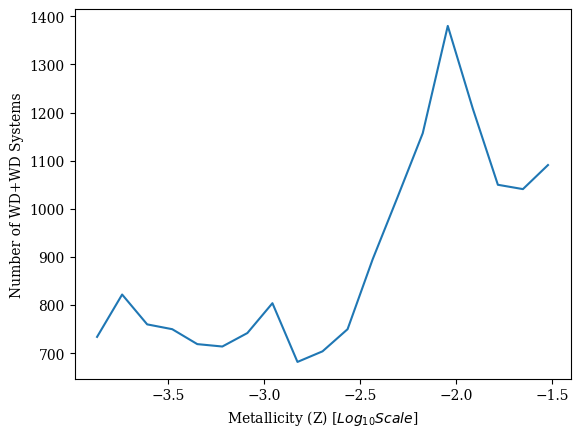

In [15]:
# need to take one less bin in the bins_Z array because the last bin is just anything greater than a certain metallicity
plt.plot(bins_Z[1:20], counts_bins_array)
plt.xlabel(r"Metallicity (Z) [$Log_{10} Scale$]")
plt.ylabel(r"Number of WD+WD Systems")

np.histogram - counting how many things in a cerain bin - another way to do the above

np.index?

In [17]:
# labels = []
# for x in range(20):
#     labels.append('bin_'+str(x+1))

# df = pd.DataFrame()

# df['bin'] = pd.cut(metallicities_log, bins, labels=labels)

Let's try a less efficent way. but one that makes more sense to me to count the number of systems in each bin

In [16]:
# let's make empty lists that help count how many of each system fit within each bin

bin_1 = []
bin_2 = []
bin_2 = []
bin_3 = []
bin_4 = []
bin_5 = []
bin_6 = []
bin_7 = []
bin_8 = []
bin_9 = []
bin_10 = []
bin_11 = []
bin_12 = []
bin_13 = []
bin_14 = []
bin_15 = []
bin_16 = []
bin_17 = []
bin_18 = []
bin_19 = []
bin_20 = []

# counting how many systems are within each bin by looping through our metallicities 
for systems in merging_all_WD['Metallicity@ZAMS(1)']:
    if np.log10(systems) < bins_Z[0]:
        bin_1.append(1)
    if (np.log10(systems) > bins_Z[0]) and (np.log10(systems) < bins_Z[1]):
        bin_2.append(1)
    if (np.log10(systems) > bins_Z[1]) and (np.log10(systems) < bins_Z[2]):
        bin_3.append(1)
    if (np.log10(systems) > bins_Z[2]) and (np.log10(systems) < bins_Z[3]):
        bin_4.append(1)
    if (np.log10(systems) > bins_Z[3]) and (np.log10(systems) < bins_Z[4]):
        bin_5.append(1)
    if (np.log10(systems) > bins_Z[4]) and (np.log10(systems) < bins_Z[5]):
        bin_6.append(1)
    if (np.log10(systems) > bins_Z[5]) and (np.log10(systems) < bins_Z[6]):
        bin_7.append(1)
    if (np.log10(systems) > bins_Z[6]) and (np.log10(systems) < bins_Z[7]):
        bin_8.append(1)
    if (np.log10(systems) > bins_Z[7]) and (np.log10(systems) < bins_Z[8]):
        bin_9.append(1)
    if (np.log10(systems) > bins_Z[8]) and (np.log10(systems) < bins_Z[9]):
        bin_10.append(1)
    if (np.log10(systems) > bins_Z[9]) and (np.log10(systems) < bins_Z[10]):
        bin_11.append(1)
    if (np.log10(systems) > bins_Z[10]) and (np.log10(systems) < bins_Z[11]):
        bin_12.append(1)
    if (np.log10(systems) > bins_Z[11]) and (np.log10(systems) < bins_Z[12]):
        bin_13.append(1)
    if (np.log10(systems) > bins_Z[12]) and (np.log10(systems) < bins_Z[13]):
        bin_14.append(1)
    if (np.log10(systems) > bins_Z[13]) and (np.log10(systems) < bins_Z[14]):
        bin_15.append(1)
    if (np.log10(systems) > bins_Z[14]) and (np.log10(systems) < bins_Z[15]):
        bin_16.append(1)          
    if (np.log10(systems) > bins_Z[15]) and (np.log10(systems) < bins_Z[16]):
        bin_17.append(1)
    if (np.log10(systems) > bins_Z[16]) and (np.log10(systems) < bins_Z[17]):
        bin_18.append(1)
    if (np.log10(systems) > bins_Z[17]) and (np.log10(systems) < bins_Z[18]):
        bin_19.append(1)
    if (np.log10(systems) > bins_Z[18]):
        bin_20.append(1)

In [17]:
# let's make a new list that specifies how many systems are in each bin
counts_bin = [len(bin_1),len(bin_2),len(bin_3),len(bin_4),len(bin_5),len(bin_6),len(bin_7),len(bin_8),len(bin_9),len(bin_10),len(bin_11),\
              len(bin_12),len(bin_13),len(bin_14),len(bin_15),len(bin_16),len(bin_17),len(bin_18),len(bin_19),len(bin_20)]
counts_bin

[0,
 734,
 822,
 760,
 750,
 719,
 714,
 742,
 804,
 682,
 704,
 750,
 895,
 1025,
 1157,
 1380,
 1208,
 1050,
 1041,
 1091]

In [18]:
#let's make sure that we are counting all of the systems
print(sum(counts_bin)) # also missing a system?
print(np.shape(merging_all_WD))

17028
(17028, 100)


In [19]:
bins_Z

array([-4.        , -3.8696316 , -3.73926319, -3.60889479, -3.47852639,
       -3.34815799, -3.21778958, -3.08742118, -2.95705278, -2.82668438,
       -2.69631597, -2.56594757, -2.43557917, -2.30521077, -2.17484236,
       -2.04447396, -1.91410556, -1.78373716, -1.65336875, -1.52300035])

Text(0, 0.5, 'Number of WD+WD Systems')

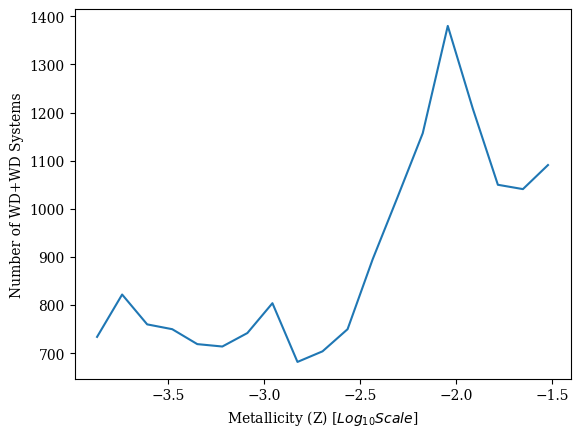

In [20]:
# let's plot our counts vs metallicities!

plt.plot(bins_Z[1:20], counts_bin[1:20])
plt.xlabel(r"Metallicity (Z) [$Log_{10} Scale$]")
plt.ylabel(r"Number of WD+WD Systems")

Let's do the same thing but normalize our counts with the amount of star forming mass needed to make the binaries at a each redshift

In [21]:
### These functions are from Lieke's Yield code on her github

def totalMassEvolvedPerZ(pathCOMPASh5, x2=0.08, x3=0.5, a1=-0.3, a2=-1.3, a3=-2.3, C1=1.,
                         binaryFraction=0.7, Mmin_universe=0.05, Mmax_universe=300., sampleSize=2000000,
                         metallicity_bins = np.logspace(-4,np.log10(0.03), 10) ):
    """_summary_

    Args:
        # COMPAS simulation parameters
        pathCOMPASh5 (_type_, optional): path to your COMPAS file. Defaults to None.

        # Broken powerlaw (Kroupa IMF) parameters
        x1, x2, x3, x4: float, the break points (mass ranges) for the three segments
        a1, a2, a3: float, the power law indices 
        <0.01 - 0.08> a = -0.3, <0.08 - 0.5> a = -1.3, <0.5 - 200> a = -2.3
        C1: float, the normalization constant for the first segment
        
        # Believes about star formation in the Universe
        binaryFraction (int, optional): What fraction of stars are in binaries. Default= 1.
        Mmin_universe, Mmax_universe (float): the min and max mass that stars in the Universe can be born with  Defaults: 0.01 and 200.

    Returns:
        _type_: _description_
    """ 
    x1 = Mmin_universe
    x4 = Mmax_universe

    # Open the COMPAS file
    COMPASdataf = h5.File(pathCOMPASh5, 'r')

    # Min and max M sampled in your COMPAS simulation.
    COMPAS_m1       = COMPASdataf['BSE_System_Parameters']['Mass@ZAMS(1)'][()]
    Mlower_COMPAS   = np.min(COMPAS_m1)
    Mupper_COMPAS   = np.max(COMPAS_m1)


    ##########################
    # Create Sample Universe 
    ##########################
    # we will use 'inverse transform sampling method' to sample our sample Universe from the IMF

    ### Primary mass
    # first we compute the y-values of the CDF of our IMF at Mmin_universe and Mmax_universe
    # Mmin_universe and Mmax_universe have to be between x1 and x4
    CDFmin = CDFbrokenPowerLaw(np.array([Mmin_universe]), x1, x2, x3, x4, a1, a2, a3, C1)
    CDFmax = CDFbrokenPowerLaw(np.array([Mmax_universe]), x1, x2, x3, x4, a1, a2, a3, C1)

    # Now we can sample Uniformly from the CDF between CDFmin and CDFmax
    drawM1      = np.random.uniform(CDFmin,CDFmax,sampleSize)
    # Convert CDF values back to masses
    M1          = invertCDFbrokenPowerLaw(drawM1, x1, x2, x3, x4, a1, a2, a3, C1)

    ### Binary fraction
    # we want that binaryFraction of the stars are in binaries
    # Hence by drawing between 0-1, we have to throw out everything that is above binaryFraction (i.e. = single and m2 = 0)
    # ! NOTE that this assumes that the binary Fraction is mass indepent! > Future work to implenet Max Moe ps and qs options
    drawBinary      = np.random.uniform(0,1,sampleSize)
    maskBinary      = drawBinary < binaryFraction  #booleans

    ### Secondary mass
    # mass ratio (q = m2/m1) distribution is assumed to be flat 
    # so then the drawM2 (if it is in a binary) just becomes the mass fraction.
    drawM2          = np.random.uniform(0,1,sampleSize)    # we are actually sampling q
    M2              = np.zeros(sampleSize)                 #
    M2[maskBinary]  = drawM2[maskBinary] * M1[maskBinary]  # = q * m1, all the ones outside the mask remain zero
    
    totalMassInStarFormation = np.sum(M1) + np.sum(M2)


    ##########################
    # Select what lies in the range of COMPAS
    ##########################
    # mask M1 and M2 to see what lies in the range of COMPAS
    maskM1          = (M1>=Mlower_COMPAS) & (M1<=Mupper_COMPAS)
    maskBinaries    = (M2!=0)
    mask_COMPAS     = maskM1 & maskBinaries

    totalMassEvolvedCOMPAS = np.sum(M1[mask_COMPAS]) + np.sum(M2[mask_COMPAS])

    ##########################
    # fraction of total universe that was sampled by COMPAS
    fraction_sampled = totalMassEvolvedCOMPAS/float(totalMassInStarFormation)

    # average mass of a binary in COMPAS simulation  
    AverageMassPerBinaryCOMPAS  = totalMassEvolvedCOMPAS / sum(mask_COMPAS)         

    ##########################
    # Finally compute the tot mass evolved per Z
    ##########################
    # load a bit more COMPAS data
    COMPAS_m2       = COMPASdataf['BSE_System_Parameters']['Mass@ZAMS(2)'][()]
    COMPAS_metals   = COMPASdataf['BSE_System_Parameters']['Metallicity@ZAMS(1)'][()]
    uniqueZ_COMPAS, countsZ_COMPAS = np.unique(COMPAS_metals, return_counts=True) #   uniqueZ_COMPAS  = np.unique(COMPAS_metals)
    
    # Determine if your samples are weighted
    boolWeighted = 'mixture_weight' in COMPASdataf['BSE_System_Parameters'].keys()

    # samples are weighted we can't just add M1 + M2 from simulation 
    if boolWeighted: 
        print('Weighted samples')        
        # I assume that if you have more than 100 metallicities, it's not discrete, but a continuous Z distribution
        if len(uniqueZ_COMPAS) > 100: 
            print('using continuous metallicities !! Assumed to be sampled flat-in-log !!')
            bin_indices          = np.digitize(COMPAS_metals, metallicity_bins) # Bin your metallicities
            # np.digitize - chekcs which metallicity bin a specific compas metals should fall in (with say which numbered bin the system should be in)
            NbinariesEvolvedPerZ = np.bincount(bin_indices, minlength=len(metallicity_bins) + 1) # Count the number of elements in each bin (counts how often each bin index occurs)
            # print("number of binaries evolved", NbinariesEvolvedPerZ)

        else: 
            print('using discrete metallicities')
            NbinariesEvolvedPerZ    = countsZ_COMPAS

        totalMassEvolvedPerMetallicity  = AverageMassPerBinaryCOMPAS * NbinariesEvolvedPerZ    
       
    # Unweighted samples 
    else: 
        print('UN-weighted samples')
        total = []
        if len(uniqueZ_COMPAS) > 100: 
            print('using continuous metallicities !! Assumed to be sampled flat-in-log !!')
            # loop over each metallicity_bin
            for Z_i in range(len(metallicity_bins) - 1):
                z_bin_mask = (COMPAS_metals >= metallicity_bins[Z_i] ) & (COMPAS_metals < metallicity_bins[Z_i+1])
                total.append( np.sum(COMPAS_m1[z_bin_mask]) + np.sum(COMPAS_m2[z_bin_mask]) )
                
        else: # Simulation with discrete metallicities
            print('using discrete metallicities')
            for Z in uniqueZ_COMPAS:
                Zmask = COMPAS_metals == Z
                total.append( np.sum(COMPAS_m1[Zmask]) + np.sum(COMPAS_m2[Zmask]) )
                
        MassEvolvedPerZ  = np.array(total)  
    
        # We need to muliply the mass evolved per metallicity times (1/fraction) to know the total mass evolved per metallicity
        totalMassEvolvedPerMetallicity = (MassEvolvedPerZ)/(fraction_sampled)

    return totalMassEvolvedPerMetallicity

def CDFbrokenPowerLaw(x, x1=0.01, x2=0.08, x3=0.5, x4=200, a1=-0.3, a2=-1.3, a3=-2.3, C1=1):
    """
    CDF values of a three-part broken powerlaw representing a Kroupa IMF by default.
    
    Parameters:
    x: array-like, the input values
    x1, x2, x3, x4: float, the break points (mass ranges) for the three segments
    a1, a2, a3: float, the power law indices 
    C1: float, the normalization constant for the first segment
    
    Returns:
    yvalues: array-like, the output values of the CDF
    """
    
    # Initialize the output array
    yvalues = np.zeros(len(x))
    
    # Calculate the normalization constants for the other segments
    # Ensuring that the next segments start where the previous segment ends
    C2 = float(C1 * (x2**(a1-a2)))
    C3 = float(C2 * (x3**(a2-a3)))
    
    # Calculate the normalization factors for the three segments
    N1 = float(((1./(a1+1)) * C1 * (x2**(a1+1))) - ((1./(a1+1)) * C1 * (x1**(a1+1))))
    N2 = float(((1./(a2+1)) * C2 * (x3**(a2+1))) - ((1./(a2+1)) * C2 * (x2**(a2+1))))
    N3 = float(((1./(a3+1)) * C3 * (x4**(a3+1))) - ((1./(a3+1)) * C3 * (x3**(a3+1))))
    
    # Calculate the denominator of the CDF
    bottom = N1+N2+N3
    
    # Calculate the CDF values for x range: x1<=x<x2
    mask1 = (x>=x1) & (x<x2)
    top1 = ( (1./(a1+1) ) * C1 * (x[mask1]**(a1+1) ) - (1./(a1+1) ) * C1 * (x1**(a1+1) ) ) 
    yvalues[mask1] = top1/bottom
    
    # Calculate the CDF values for x range: x2<=x<x3
    mask2 = (x>=x2) & (x<x3)
    top2 =  N1 + ( (1./(a2+1) ) * C2 * (x[mask2]**(a2+1) ) - (1./(a2+1)) * C2 * (x2**(a2+1) ) ) 
    yvalues[mask2] = top2/bottom
    
    # Calculate the CDF values for x range: x3<=x<=x4
    mask3 = (x>=x3) & (x<=x4)
    top3 =  N1 + N2 + ( (1./(a3+1)) * C3 * (x[mask3]**(a3+1)) - (1./(a3+1)) * C3 * (x3**(a3+1) ) )
    yvalues[mask3] = top3/bottom
    
    return yvalues


def invertCDFbrokenPowerLaw(CDF, x1, x2, x3, x4, a1, a2, a3, C1):
    """
    Invert y-values of a CDF back to x-vals (i.e. the masses)
    Specifically for a three-part piece-wise powerlaw representing a Kroupa IMF by default. 

    Parameters:
    CDF: array-like, the CDF values to invert
    x1, x2, x3, x4: float, the break points (ranges) for the three segments
    a1, a2, a3: float, the power law indices for the three segments
    C1: float, the normalization constant for the first segment

    Returns:
    xvalues: array-like, the inverted CDF values
    """
    
    # Calculate the normalization constants for the second and third segments
    C2 = float(C1 * (x2**(a1-a2)))
    C3 = float(C2 * (x3**(a2-a3)))
    
    # Calculate the area under the curve for each segment
    N1 = float(((1./(a1+1)) * C1 * (x2**(a1+1))) - ((1./(a1+1)) * C1 * (x1**(a1+1))))
    N2 = float(((1./(a2+1)) * C2 * (x3**(a2+1))) - ((1./(a2+1)) * C2 * (x2**(a2+1))))
    N3 = float(((1./(a3+1)) * C3 * (x4**(a3+1))) - ((1./(a3+1)) * C3 * (x3**(a3+1))))
    
    # Calculate the CDF values at the breakpoints
    CDFx2 = CDFbrokenPowerLaw(np.array([x2,x2]), x1, x2, x3, x4, a1, a2, a3, C1)[0]
    CDFx3 = CDFbrokenPowerLaw(np.array([x3,x3]), x1, x2, x3, x4, a1, a2, a3, C1)[0]

    # Initialize the output array
    xvalues = np.zeros(len(CDF))
    
    # Calculate the inverse CDF values for the first segment
    mask1 = (CDF < CDFx2)
    xvalues[mask1] =  (((CDF[mask1]*(N1+N2+N3))  + \
                      ( (1./(a1+1))*C1*(x1**(a1+1))))/((1./(a1+1))*C1))**(1./(a1+1))
    
    # Calculate the inverse CDF values for the second segment
    mask2 = (CDFx2<= CDF) & (CDF < CDFx3)
    xvalues[mask2] = ((((CDF[mask2]*(N1+N2+N3))-(N1))  + \
                      ( (1./(a2+1))*C2*(x2**(a2+1))))/((1./(a2+1))*C2))**(1./(a2+1))
    
    # Calculate the inverse CDF values for the third segment
    mask3 = (CDFx3<= CDF) 
    xvalues[mask3] = ((((CDF[mask3]*(N1+N2+N3))-(N1+N2))  + \
                      ((1./(a3+1))*C3*(x3**(a3+1))))/((1./(a3+1))*C3))**(1./(a3+1))
    
    # Return the inverse CDF values
    return xvalues

In [23]:
# Get the total mass evolved per Z
# think about hoe bonary fraction changes for different mass bins (Offner, Moe 2022) - figure 1
# i don't think m_min and m_max are of the simulation - thye ar eof the universe so keep these values
totalMassEvolvedPerMetallicity_WD = totalMassEvolvedPerZ(pathToweights_H5,
                         binaryFraction=0.5, Mmin_universe=0.05, Mmax_universe=300.,
                         metallicity_bins = 10**(bins_Z))
print('Total mass evolved per Z for WD+WD:', totalMassEvolvedPerMetallicity_WD)

Weighted samples
using continuous metallicities !! Assumed to be sampled flat-in-log !!
Total mass evolved per Z for WD+WD: [0.00000000e+00 2.39436212e+05 2.36694818e+05 2.39463444e+05
 2.40334880e+05 2.39467983e+05 2.39404440e+05 2.39009571e+05
 2.38360532e+05 2.39213814e+05 2.37520867e+05 2.38033744e+05
 2.38337839e+05 2.38823483e+05 2.39980859e+05 2.38092747e+05
 2.39331821e+05 2.37094226e+05 2.38787173e+05 2.41142774e+05
 1.99704161e+02]


In [29]:
print("Length of metallicity bins list", len(bins_Z))
print("Length of the total mass evlolved per metallicity list", len(totalMassEvolvedPerMetallicity_WD))

Length of metallicity bins list 20
Length of the total mass evlolved per metallicity list 21


It seems like the first mass evolved per metallicity is zero and represents the stars appearing in our simulation? We need no mass to envolve the inital mass? The length of this list is one more than the bins so we just need everything in total mass evolve per Z except for the first element

We now need to find the amount of systems that fall into each bin and then weight this count with the weights column 

In [24]:
bin_indices_WD = np.digitize(np.log10(merging_all_WD['Metallicity@ZAMS(1)']), bins_Z) # Bin your metallicities, make sure both bins in log space
# np.digitize - checks which metallicity bin a specific compas metals should fall in (with say which numbered bin the system should be in)
# return an array of numbers that represent the bins (the 1st metallicity is in bin 5...)
print(bin_indices_WD)

[ 5 11 11 ...  5 13 13]


In [25]:
# we now want to find the actual number of systems that should fall into each bin by considering the weights fo each system
weighted_counts_WD = [] # let's make an empty list to add to later

# we can loop through our first to 20th metallicity bin
for bin in np.unique(bin_indices_WD):
    metals_bool = np.where(bin_indices_WD==bin)[0] # we want to see where in our array a system falls within to a certain bin
    # for example we want to see where in bin_indicies the systems fall into the first metallicity bin 
    weighted_counts_WD.append(sum(merging_all_WD['mixture_weight'].iloc[metals_bool])) # we then select only the weights pertaining to a certian metallicity bin and sum them up

Let's now compute the formation efficency by divinding these weighted counts and the mass evolved to form these systems for each metallicity

In [38]:
# divide the weighted sums with the total mass evolved oer metallicity
formation_efficency = weighted_counts_WD/totalMassEvolvedPerMetallicity_WD[1:] 
# N_wdwd/M_evolv
# number of systems formed / mass evolved for these systems to be made (take the nondiscrete and weighted samples metallicity)

In [39]:
formation_efficency

array([0.00503032, 0.00673058, 0.00616612, 0.00595026, 0.00546586,
       0.00552529, 0.00517334, 0.00606449, 0.0057662 , 0.00598986,
       0.00652104, 0.00573847, 0.00451613, 0.00459251, 0.00560331,
       0.00596323, 0.00648453, 0.00621632, 0.00589026, 0.00180437])

Let's use this formation efficency to get the overall trend of the metallicity distirbution

Text(0, 0.5, 'Number of WD+WD Systems')

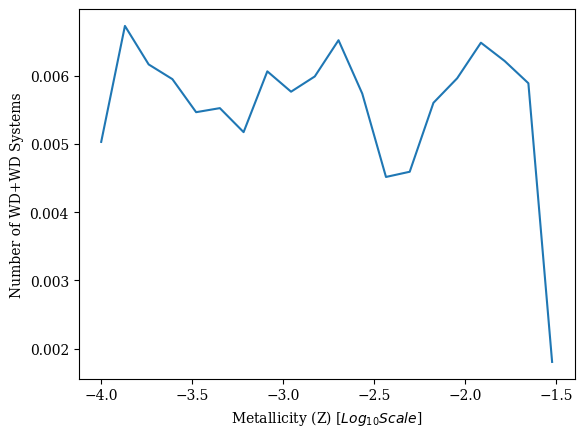

In [40]:
# let's plot our counts vs metallicities!

plt.plot(bins_Z, formation_efficency)
plt.xlabel(r"Metallicity (Z) [$Log_{10} Scale$]")
plt.ylabel(r"Number of WD+WD Systems")

Both methods get me the same plot and values! We are just missing one system in each method

Let's do this again for neutron star - neutron star systems

In [41]:
# reading in the HDF5 file
pathTorates_NS = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_NSNS_AIS/CosmicIntegration/Rate_info.h5' #path of the hdf5 file

Data_rates_NS = h5.File(pathTorates_NS)

In [42]:
list(Data_rates_NS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'].keys())
rates_info_NS = Data_rates_NS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']
rates_info_NS.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [43]:
dco_mask_NS = rates_info_NS['DCOmask'][()]

In [44]:
# reading in the HDF5 file
pathToweights_NS = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_NSNS_AIS/MainRun/COMPAS_Output_wWeights.h5' #path of the hdf5 file

Data_weights_NS = h5.File(pathToweights_NS)

In [45]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_NS_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights_NS["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_NS_data[key] = Data_weights_NS["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [46]:
merging_all_NS = DCO_NS_data[dco_mask_NS]
merging_all_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
323,1,4.914255,0.144223,0,b'2 ',b'4-8 ',1.210342,1.442315,1,0.000686,...,7235,0.002952,13,13,38.082441,0.000099,-1.448854,0.0,0.0,0.024294
1336,1,110.465241,0.730318,0,b'2 ',b'4-8 ',1.260087,1.424028,1,0.000537,...,29725,0.012377,13,13,39.974896,0.000087,-1.417040,0.0,0.0,0.028337
1759,1,3594.070404,0.356025,0,b'5 ',b'8 ',1.480496,1.171439,1,0.025743,...,39167,0.016939,13,13,24.544319,0.000072,-1.093873,0.0,0.0,0.011341
1915,1,15.038578,0.292517,0,b'4-8 ',b'8 ',1.188053,1.203831,1,0.001179,...,42602,0.003843,13,13,38.306424,0.000179,-1.376143,0.0,0.0,0.025722
1955,1,6.854551,0.692189,0,b'2 ',b'4-8 ',1.260033,1.195963,1,0.013255,...,43466,0.005260,13,13,36.808308,0.000033,-1.205352,0.0,0.0,0.023426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46667,1,2.035270,0.304401,0,b'2 ',b'4-8 ',1.242316,1.573235,1,0.002852,...,999727,0.002643,13,13,35.825917,0.000153,-1.611445,0.0,0.0,0.013998
46668,1,0.978486,0.008180,0,b'2 ',b'4-8 ',1.260145,1.554736,1,0.000184,...,999770,0.002022,13,13,36.031843,0.000145,-1.593994,0.0,0.0,0.025480
46671,1,2.060512,0.283681,0,b'2 ',b'4-8 ',1.260112,1.308423,1,0.000471,...,999894,0.002454,13,13,40.501417,0.000112,-1.432607,0.0,0.0,0.007313
46672,1,0.808230,0.271005,0,b'2 ',b'4-8 ',1.260144,1.752863,1,0.000146,...,999931,0.002160,13,13,36.358539,0.000144,-1.707163,0.0,0.0,0.017477


In [47]:
# let's first make our bins that we want that are evenly spaced in log
metallicities_NSNS = np.array(merging_all_NS['Metallicity@ZAMS(1)'])
metallicities_log_NSNS = np.log10(metallicities)
even_Z_NSNS = np.linspace(-4, np.max(metallicities_log_NSNS), 20)
bins_Z_NSNS = even_Z_NSNS
bins_Z_NSNS

array([-4.        , -3.8696316 , -3.73926319, -3.60889479, -3.47852639,
       -3.34815799, -3.21778958, -3.08742118, -2.95705278, -2.82668438,
       -2.69631597, -2.56594757, -2.43557917, -2.30521077, -2.17484236,
       -2.04447396, -1.91410556, -1.78373716, -1.65336875, -1.52300035])

We now want to count how many systems are in each of these metallicity bins

In [48]:
# what is m_min and m_max of our universe?
# we want to read in the bse_RLOF to get information about thes different systems

SP_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_data[key] = Data_weights["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

print(min(SP_data['Mass@ZAMS(1)']))
print(max(SP_data['Mass@ZAMS(1)']))

0.9000149145946927
149.99316622286932


In [49]:
# Get the total mass evolved per Z
# think about hoe bonary fraction changes fro different mass bins (Offner, Moe 2022) - figure 1
totalMassEvolvedPerMetallicity_NS = totalMassEvolvedPerZ(pathToweights_H5,
                         binaryFraction=0.7, Mmin_universe=0.05, Mmax_universe=300.,
                         metallicity_bins = 10**(bins_Z_NSNS))
print('Total mass evolved per Z:', totalMassEvolvedPerMetallicity_NS)

Weighted samples
using continuous metallicities !! Assumed to be sampled flat-in-log !!
Total mass evolved per Z: [0.00000000e+00 2.43110294e+05 2.40326834e+05 2.43137944e+05
 2.44022752e+05 2.43142552e+05 2.43078035e+05 2.42677106e+05
 2.42018109e+05 2.42884483e+05 2.41165559e+05 2.41686305e+05
 2.41995067e+05 2.42488163e+05 2.43663299e+05 2.41746214e+05
 2.43004301e+05 2.40732372e+05 2.42451296e+05 2.44843043e+05
 2.02768566e+02]


In [46]:
bin_indices          = np.digitize(np.log10(merging_all_NS['Metallicity@ZAMS(1)']), bins_Z_NSNS) # Bin your metallicities, make sure both bins in log space
# np.digitize - checks which metallicity bin a specific compas metals should fall in (with say which numbered bin the system should be in)
# return an array of numbers that represent the bins (the 1st metallicity is in bin 5...)
print(bin_indices)
NbinariesEvolvedPerZ = np.bincount(bin_indices, minlength=len(bins_Z_NSNS) + 1) # Count the number of elements in each bin (counts how often each bin index occurs)
# print("number of binaries evolved", NbinariesEvolvedPerZ)
NbinariesEvolvedPerZ

[ 7  6 19 ...  6  2  2]


array([  0, 142, 304, 361, 372, 326, 262, 262, 226, 148, 150,  92,  66,
        70,  66,  72, 118, 192, 157,  47,   0])

In [39]:
print(bin_indices)
# this is an array of the number of counts related to each bin
# the first index is 7 because the first system belongs to metallicity bin 7 
print(len(np.unique(bin_indices))) #  there should be 20 metallicity bins? 
print(np.unique(bin_indices))

[ 7  6 19 ...  6  2  2]
19
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [52]:
# weights = np.array(merging_all_NS['mixture_weight']) # let's gather the micture weights we have for these systems
weighted_counts = [] # let's make an empty list to add to later

# we can loop through our first to 20th metallicity bin
for bin in np.unique(bin_indices):
    metals_bool = np.where(bin_indices==bin)[0] # we want to see where in our array a system falls within to a certain bin
    # for example we want to see where in bin_indicies the systems fall into the first metallicity bin 
    weighted_counts.append(sum(merging_all_NS['mixture_weight'].iloc[metals_bool])) # we then select only the weights pertaining to a certian metallicity bin and sum them up

In [54]:
len(weighted_counts)
weighted_counts # weighted sum of corresponding number of systems 

[3.275984610947761,
 7.6837301480719065,
 8.734986537957491,
 11.42173691072622,
 10.82811408118992,
 7.644141882576519,
 7.757606868678839,
 7.970127520709394,
 4.947287661492929,
 3.8836886263474706,
 1.9624462331525698,
 2.828024949863662,
 1.7743185331224782,
 2.721629950887062,
 1.7825986548880743,
 5.504225014567616,
 7.997601677328553,
 5.571675260446181,
 1.4526800161878533]

In [55]:
# divide the weighted sums with the total mass evolved oer metallicity

formation_efficency = weighted_counts/totalMassEvolvedPerMetallicity 
# number of systems formed / mass evolved for these systems to be made (take the nondiscrete and weighted samples metallicity)

ValueError: operands could not be broadcast together with shapes (19,) (21,) 

Text(0, 0.5, 'Number of NSNS Systems')

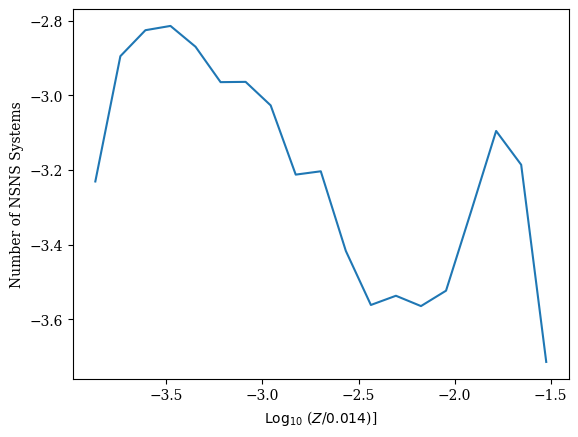

In [43]:
# need to take one less bin in the bins_Z array because the last bin is just anything greater than a certain metallicity
plt.plot(bins_Z_NSNS[1:20], np.log10(counts_bins_NSNS_array/totalMassEvolvedPerMetallicity[1:20])) # this does not seem correct 
plt.xlabel(r"$\mathrm{Log_{10}}$ ($Z$/$\mathrm{0.014}$)]")
plt.ylabel(r"Number of NSNS Systems")

Let's try the histogram route

Text(0, 0.5, 'dN/$dM_{2}$ [$Log_{10} Scale$]')

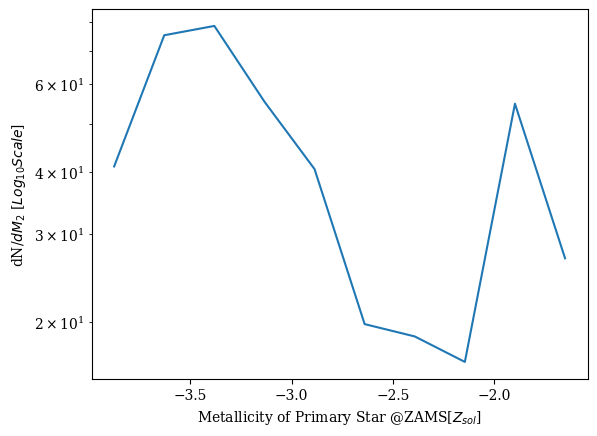

In [44]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(np.log10(merging_all_NS['Metallicity@ZAMS(1)']), weights=merging_all_NS['mixture_weight'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,(hist/bin_width))
# plt.step(center_bins,hist/bin_width,where='mid')

plt.xlabel(r"Metallicity of Primary Star @ZAMS[$Z_{sol}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dN/$dM_{2}$ [$Log_{10} Scale$]")
# plt.title("Mass Distribution of the Primary Star")\



In [45]:
# i think I also need to find the anount of mass caused to form a NSNS merger oer metallicity
# do this for the neutron star simulation and divide by total mass evloved per metallicity and see if comparable to what Lieke sent
# because using AIS, we need to sum the weights of each system to count whihc systems go to which bins accuratley - if I used np.histogram (use the flag weights)
# or use what I did before but instead of counting each system, 

Let's try to normalize this with the average star forming mass needed for each metallicity